# **Breast Cancer Classification using Machine Learning.**

# **Introduction**
Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

Classification and data mining methods are an effective way to classify data. Especially in medical field, where those methods are widely used in diagnosis and analysis to make decisions.

### **Recommended Screening Guidelines**

**Mammography** : The most important screening test for breast cancer is the mammogram. A mammogram is an X-ray of the breast. It can detect breast cancer up to two years before the tumor can be felt by you or your doctor.

Women age 40–45 or older who are at average risk of breast cancer should have a mammogram once a year.

Women at high risk should have yearly mammograms along with an MRI starting at age 30.

**Some Risk Factors for Breast Cancer**

The following are some of the known risk factors for breast cancer. However, most cases of breast cancer cannot be linked to a specific cause. Talk to your doctor about your specific risk.

1. **Age** : The chance of getting breast cancer increases as women age. Nearly 80 percent of breast cancers are found in women over the age of 50.

2. **Personal history of breast cancer** : A woman who has had breast cancer in one breast is at an increased risk of developing cancer in her other breast.

3. **Family history of breast cancer** : A woman has a higher risk of breast cancer if her mother, sister or daughter had breast cancer, especially at a young age (before 40). Having other relatives with breast cancer may also raise the risk.

4. **Genetic factors** : Women with certain genetic mutations, including changes to the BRCA1 and BRCA2 genes, are at higher risk of developing breast cancer during their lifetime. Other gene changes may raise breast cancer risk as well.

5. **Childbearing and menstrual history** : The older a woman is when she has her first child, the greater her risk of breast cancer. Also at higher risk are:

* Women who menstruate for the first time at an early age (before 12)
* Women who go through menopause late (after age 55)
* Women who’ve never had children

This project will have the following key takeaways:

1. **Data insight**: As mentioned here I will be working with the breast cancer dataset and I will be putting out interesting inferences from the data to derive some meaningful results.

2. **EDA**: Exploratory data analysis is the key step for getting meaningful results.

3. **Feature engineering**: After getting the insights from the data I have to select the features so that I'll be using for the model building phase.

4. **Model building**: In this phase, I will be building the Machine learning model for breast cancer prediction.

### **About the Dataset**

The dataset used in this story is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector

**Attribute Information**:

1. ID number 
2. Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

3. radius (mean of distances from center to points on the perimeter)
4. texture (standard deviation of gray-scale values)
5. perimeter
area
6. smoothness (local variation in radius lengths)
7. compactness (perimeter² / area — 1.0)
8. concavity (severity of concave portions of the contour)
9. concave points (number of concave portions of the contour)
symmetry
10. fractal dimension (“coastline approximation” — 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

**Data Collection & Processing**

In [ ]:
# loading the dataset from csv file into a Pandas Dataframe
data = pd.read_csv("/content/data.csv")
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


**Exploratory Data Analysis (EDA)**

In [ ]:
# size of the dataset
data.shape

(569, 32)

The dataset contains 569 rows which indicates a smaller set of data, proceeding to see the type of each feature present in the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

*   Out of 31 features, we have 1 int type, 1 object type and 29 with the float data type.
*   Fortunately, this dataset doesn’t hold any missing values.

let’s see how statistically the dataset is spread.

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Although not compulsory, it is always better to check the correlation between the features for easier analysis on which feature is negatively correlated and which is positively correlated so, checking the correlation between various features.

Correlation between other features, mean features only:

In [ ]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
data[cols].corr()

11


<ipython-input-6-3dd0d031459a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[cols].corr()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


<ipython-input-7-dfabcedbfdce>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);


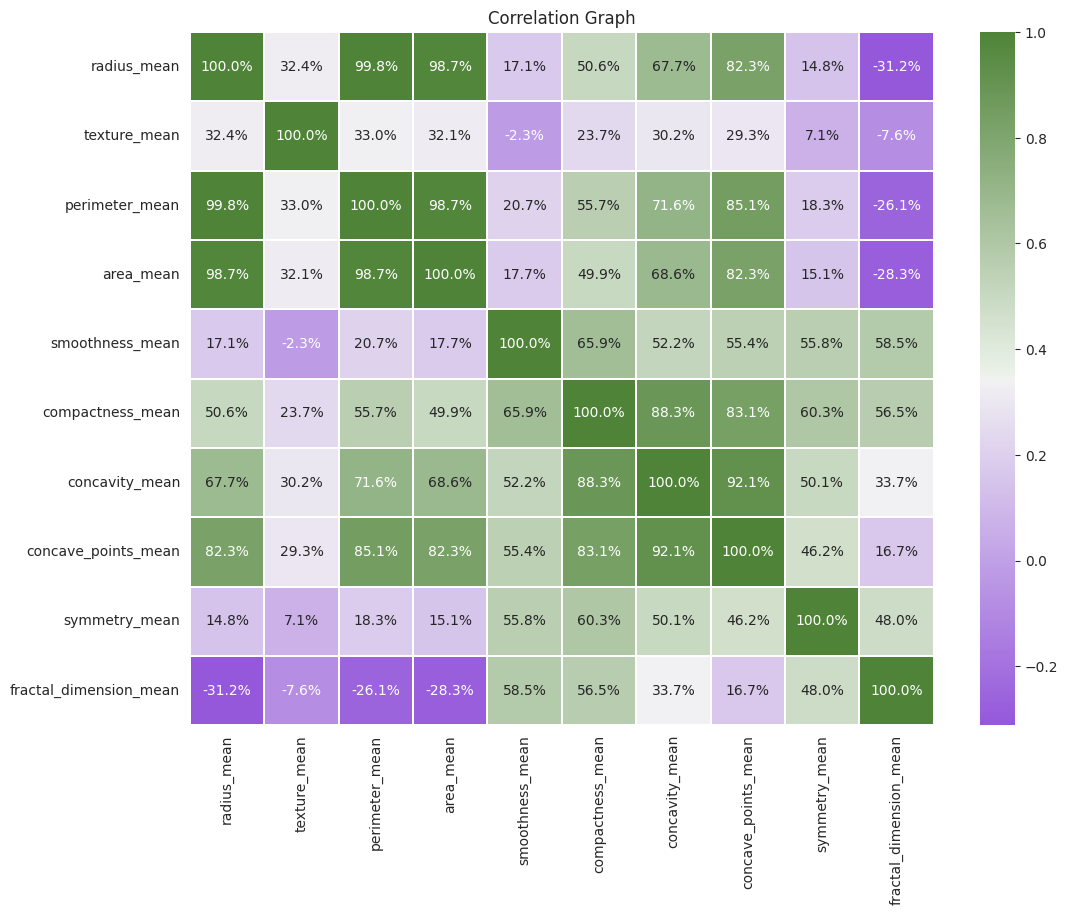

In [ ]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

**Getting the object features**

Using this method, I can check how many object(categorical) type of feature exists in dataset.

In [ ]:
data.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


checking for unique values


In [ ]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Data Visualization**

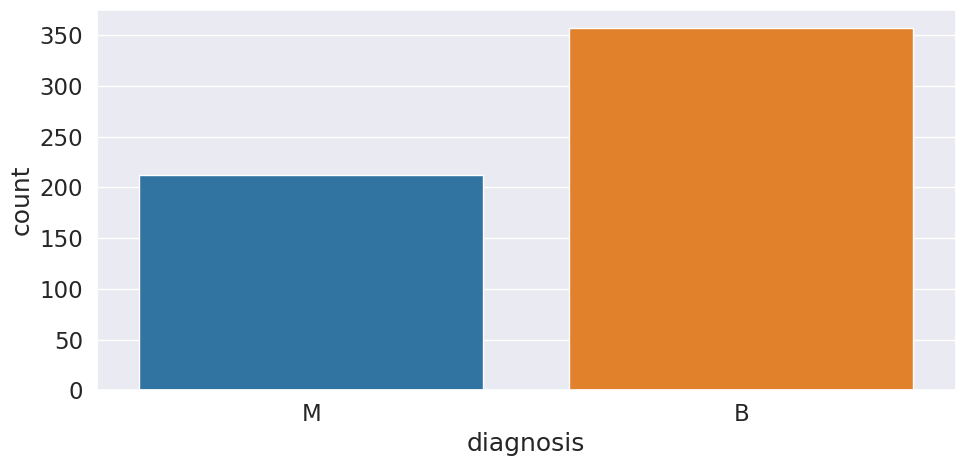

In [ ]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=data['diagnosis'])
plt.tight_layout()

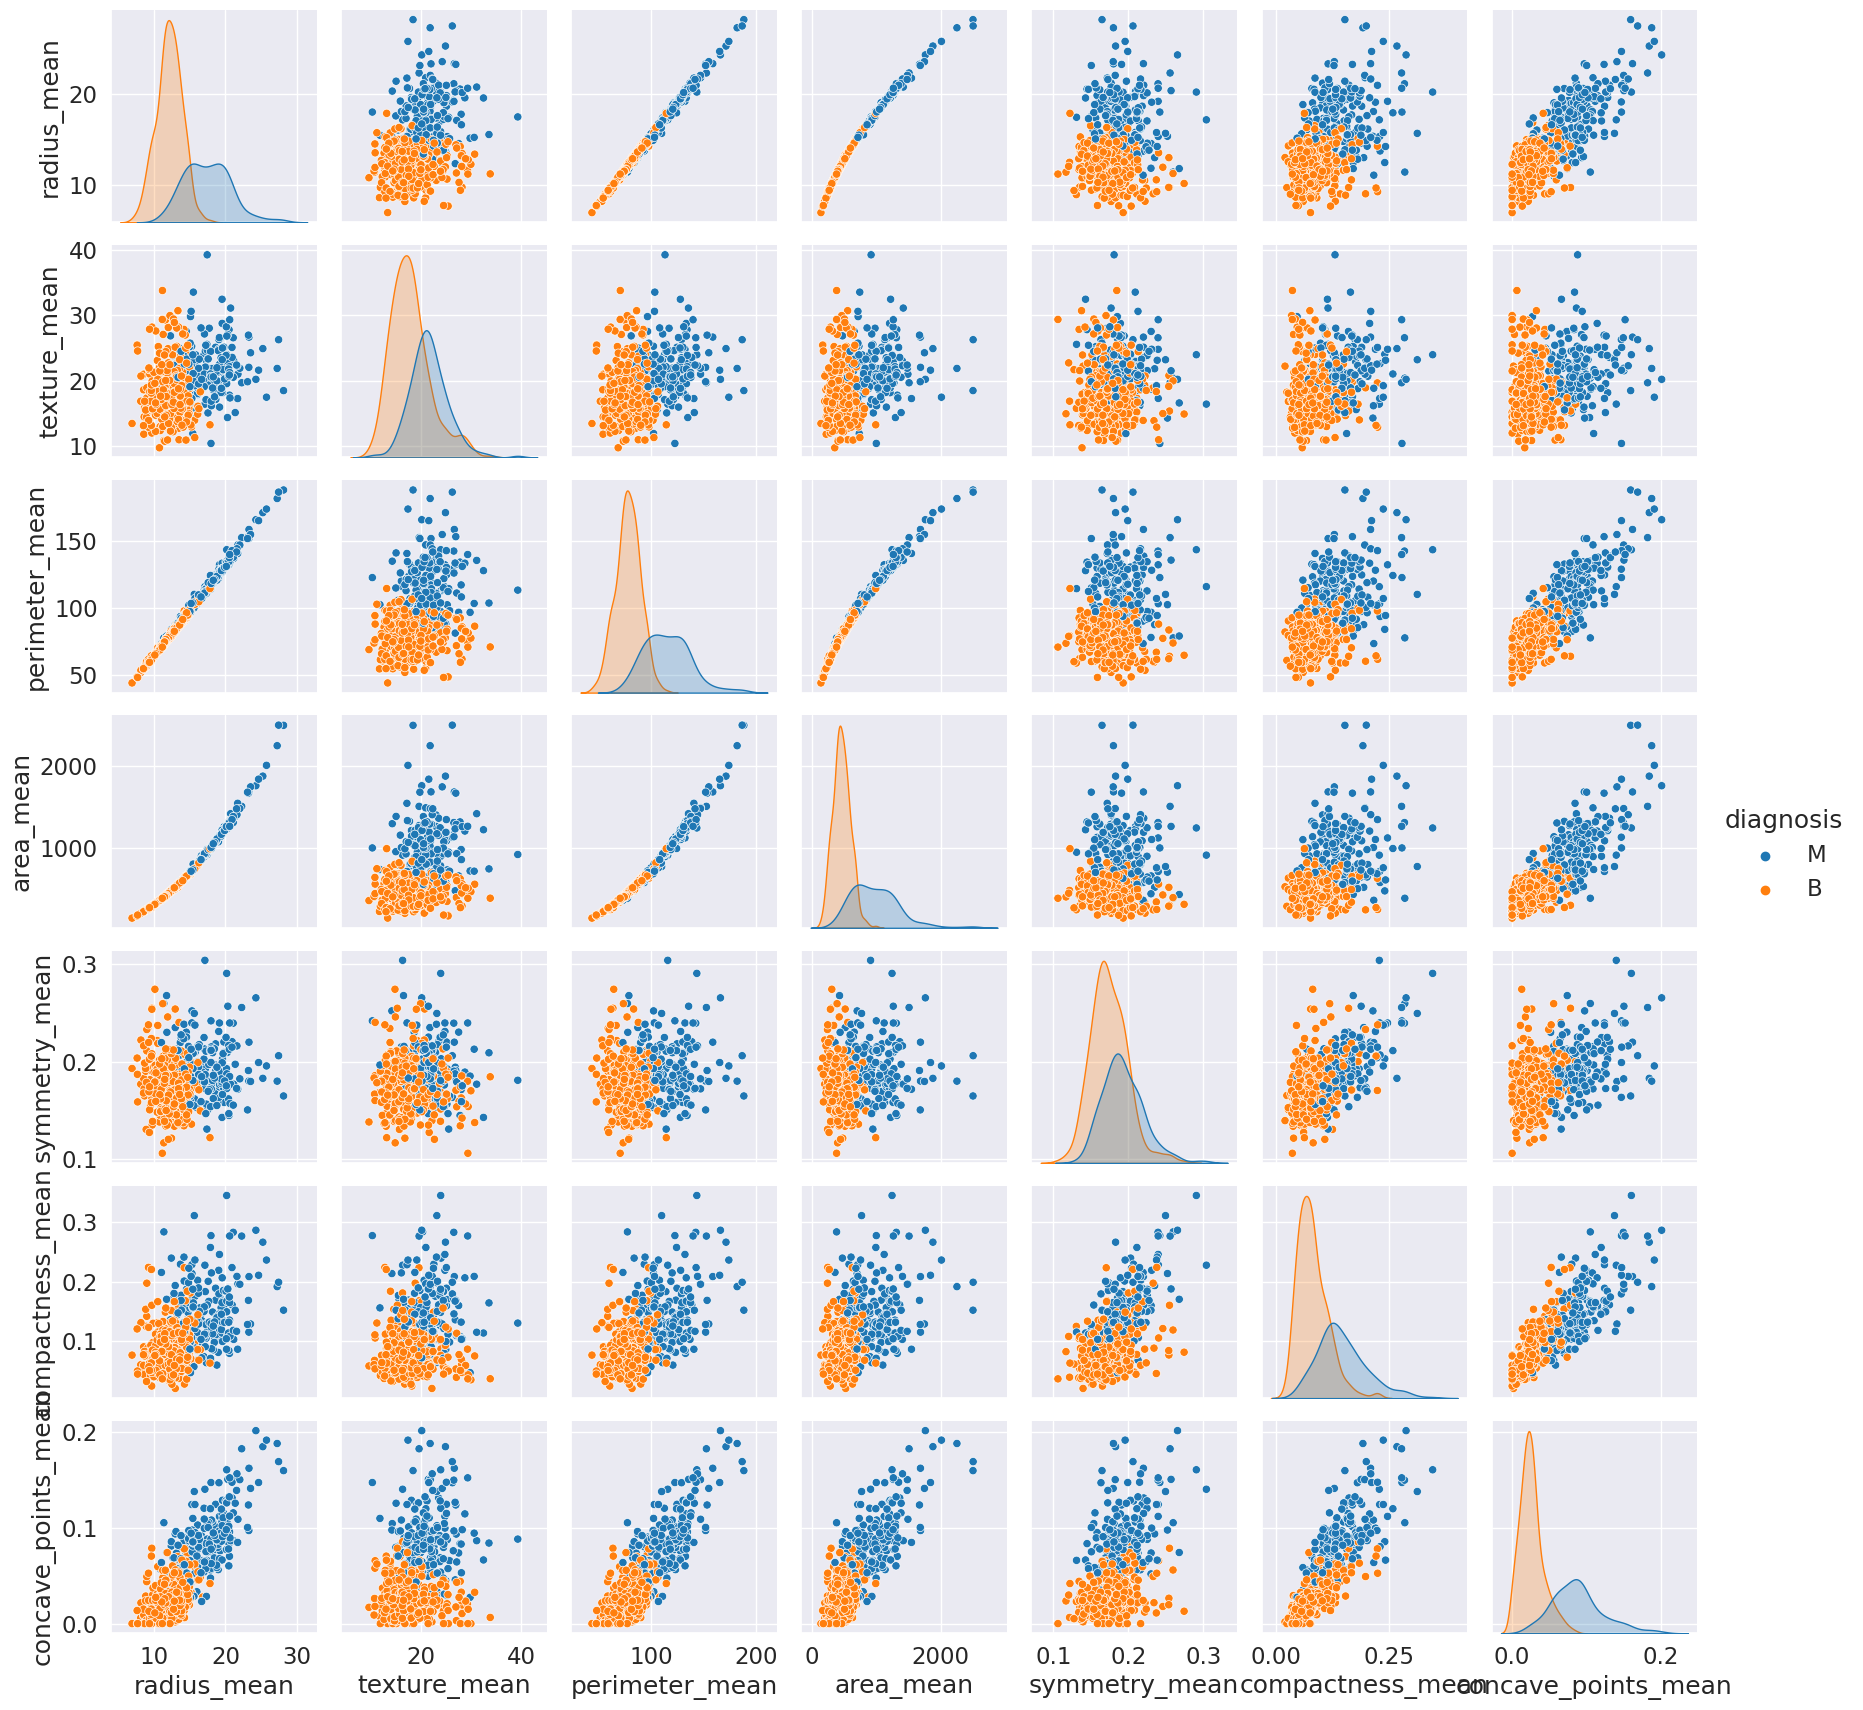

In [ ]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "symmetry_mean", "compactness_mean", "concave_points_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

**Feature Engineering**

In [ ]:
data.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [ ]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave_points_mean']

targeted_feature = 'diagnosis'

len(prediction_feature)

6

In [ ]:
X = data[prediction_feature]
X

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave_points_mean
0,17.99,122.80,1001.0,0.2419,0.27760,0.14710
1,20.57,132.90,1326.0,0.1812,0.07864,0.07017
2,19.69,130.00,1203.0,0.2069,0.15990,0.12790
3,11.42,77.58,386.1,0.2597,0.28390,0.10520
4,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.13890
565,20.13,131.20,1261.0,0.1752,0.10340,0.09791
566,16.60,108.30,858.1,0.1590,0.10230,0.05302
567,20.60,140.10,1265.0,0.2397,0.27700,0.15200


In [ ]:
y = data.diagnosis
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

**Categorical Values**

I will use Label Encoder to label the categorical data which is the diagnosis column in the dataset. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.

In [ ]:
#Encoding categorical data values

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### **Building the Model**

We'll start by splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

X_train.head()

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave_points_mean
274,17.93,115.20,998.9,0.1538,0.07027,0.04744
189,12.30,78.83,463.7,0.1667,0.07253,0.01654
158,12.06,76.84,448.6,0.1590,0.05241,0.01963
257,15.32,103.20,713.3,0.2398,0.22840,0.12420
486,14.64,94.21,666.0,0.1409,0.06698,0.02791


**Perform Feature Standard Scalling**

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Logistic Regression**

In [ ]:
# Using Logistic Regression Algorithm to the Training Set
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# accuracy on test data
test_data_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test data = ', test_data_accuracy * 100)

Accuracy on test data =  90.95744680851064


The Logistic Regression Model achieved an accuracy of 90% on the test data.

**KNN**

In [ ]:
# Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)

# accuracy on test data
test_data_accuracy = accuracy_score(y_test, y_pred2)
print('Accuracy on test data = ', test_data_accuracy * 100)

Accuracy on test data =  92.02127659574468


The KNN Model achieved an accuracy of 92% on the test data.

**Random Forest Classifier**

In [ ]:
# Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)

# accuracy on test data
test_data_accuracy = accuracy_score(y_test, y_pred3)
print('Accuracy on test data = ', test_data_accuracy * 100)

Accuracy on test data =  90.95744680851064


The Random Forest Classifier Model achieved an accuracy of 90% on the test data.

**Decision Tree Classifier.**

In [ ]:
# Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)
y_pred4 = tree.predict(X_test)

# accuracy on test data
test_data_accuracy = accuracy_score(y_test, y_pred4)
print('Accuracy on test data = ', test_data_accuracy * 100)

Accuracy on test data =  90.95744680851064


The Decision Tree Classifier Model achieved an accuracy of 90% on the test data.

**Naïve Bayes Algorithm**

In [ ]:
# Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred5 = naive.predict(X_test)

# accuracy on test data
test_data_accuracy = accuracy_score(y_test, y_pred5)
print('Accuracy on test data = ', test_data_accuracy * 100)


Accuracy on test data =  90.42553191489363


The Gaussian NB method of the Naïve Bayes Algorithm achieved an accuracy of 90% on the test data.

**SVM Algorithm**

In [ ]:
# Using SVC method of svm class to use Kernel SVM Algorithm
rbf = SVC(kernel = 'rbf', random_state = 0)
rbf.fit(X_train, y_train)
y_pred6 = rbf.predict(X_test)

# accuracy on test data
test_data_accuracy = accuracy_score(y_test, y_pred6)
print('Accuracy on test data = ', test_data_accuracy * 100)

Accuracy on test data =  91.48936170212765


The SVC method of the SVM Algorithm achieved an accuracy of 91% on the test data.

### **Saving the Model**


In [ ]:
import pickle
filename = 'breast_cancer.sav'
pickle.dump(model, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('breast_cancer.sav', 'rb'))

**Building a Predictive System**

In [ ]:
input_data = (17.93, 115.20, 998.9, 0.1538, 0.07027, 0.04744)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')



[1]
The Breast Cancer is Benign


### **Conclusion**

Late detection of breast cancer leads to severe damages to the body and worst case loss of life. Thus its early detection is significant. For early detection of the disease, I utilized machine learning algorithms such as Logistic Regression, KNN, Decision Tree, Naïve Bayes, Random Forest & SVM and after applying these machine learing models on the dataset I found out that KNN is more suitable to predict the onset of the disease as it has an accuracy of 92%, which will enable early treatment and save a life.